In [441]:
import pandas as pd
import numpy as np
import chardet
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import re
import spacy

In [442]:
with open('/content/messy_IMDB_dataset.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('/content/messy_IMDB_dataset.csv', delimiter=';', quotechar='"', encoding=result['encoding'], )

In [443]:
df.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMBD title ID   100 non-null    object 
 1   Original titlÊ  100 non-null    object 
 2   Release year    100 non-null    object 
 3   Genrë¨          100 non-null    object 
 4   Duration        99 non-null     object 
 5   Country         100 non-null    object 
 6   Content Rating  77 non-null     object 
 7   Director        100 non-null    object 
 8   Unnamed: 8      0 non-null      float64
 9   Income          100 non-null    object 
 10   Votes          100 non-null    object 
 11  Score           100 non-null    object 
dtypes: float64(1), object(11)
memory usage: 9.6+ KB


**Renaming the Column names**

In [445]:
df = df.rename(columns={'IMBD title ID': 'ID', 'Original titlÊ': 'Title', 'Genrë¨': 'Genre', 'Income': 'Earnings'})
df.columns

Index(['ID', 'Title', 'Release year', 'Genre', 'Duration', 'Country',
       'Content Rating', 'Director', 'Unnamed: 8', 'Earnings', ' Votes ',
       'Score'],
      dtype='object')

**Convert the Release year Column to correct Year-Month-Day formate**

In [446]:
df['Release year'] = pd.to_datetime(df['Release year'], errors='coerce')

# Convert the datetime objects to a uniform format (e.g., YYYY-MM-DD)
df['Release year'] = df['Release year'].dt.strftime('%Y-%m-%d')
df.head()

,ID,Title,Release year,Genre,Duration,Country,Content Rating,Director,Unnamed: 8,Earnings,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,9.3
1,tt0068646,The Godfather,NaN,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,9.2
2,tt0468569,The Dark Knight,NaN,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,9.
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f"


In [447]:
df.isnull().sum() # looking for null/NaN values

,0
ID,1
Title,1
Release year,12
Genre,1
Duration,2
Country,1
Content Rating,24
Director,1
Unnamed: 8,101
Earnings,1


**Dropping the Unnamed: 8 Column**

In [448]:
df.drop(columns=['Unnamed: 8'], inplace=True) # this column has more NaN values and was not necessary so we drop it
df.isnull().sum()

,0
ID,1
Title,1
Release year,12
Genre,1
Duration,2
Country,1
Content Rating,24
Director,1
Earnings,1
Votes,1


In [449]:
print(df.isnull().any()) #checking that is there any missing values?

ID                True
Title             True
Release year      True
Genre             True
Duration          True
Country           True
Content Rating    True
Director          True
Earnings          True
 Votes            True
Score             True
dtype: bool


In [450]:
df = df.dropna() #dropping all missing values

In [451]:
df.isnull().sum() #again looking for any missing values

,0
ID,0
Title,0
Release year,0
Genre,0
Duration,0
Country,0
Content Rating,0
Director,0
Earnings,0
Votes,0


In [452]:
df

,ID,Title,Release year,Genre,Duration,Country,Content Rating,Director,Earnings,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,$ 222831817,1.780.147,"8,9f"
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",Nan,USA,R,Steven Spielberg,$ 322287794,1.183.248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",96,USA,Not Rated,Sidney Lumet,$ 576,668.473,8.9
...,...,...,...,...,...,...,...,...,...,...,...
94,tt2106476,Jagten,2012-11-22,Drama,115,Denmark,R,Thomas Vinterberg,$ 15843274,269.616,7.5
95,tt0056172,Lawrence of Arabia,1963-10-29,"Adventure, Biography, Drama",228,UK,PG,David Lean,$ 45710874,261.504,7.5
96,tt0070735,The Sting,1974-03-21,"Comedy, Crime, Drama",129,USA,PG,George Roy Hill,$ 156000000,236.285,7.5
97,tt0082096,Das Boot,1982-03-18,"Adventure, Drama, Thriller",149,West Germany,R,Wolfgang Petersen,$ 11487676,226.427,7.5


In [453]:
#checking for any empty rows/cells/empty strings
empty_rows = df.applymap(lambda x: x.strip() == '').any(axis=1)
empty_rows 

<ipython-input-453-7997803ca0b1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_rows = df.applymap(lambda x: x.strip() == '').any(axis=1)


,0
0,False
3,False
4,True
6,False
7,False
...,...
94,False
95,False
96,False
97,False


In [455]:
df = df.replace('', np.nan).dropna() #replacing empty strings with nan and then drop it
df.head()

,ID,Title,Release year,Genre,Duration,Country,Content Rating,Director,Earnings,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",Nan,USA,R,Steven Spielberg,$ 322287794,1.183.248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",96,USA,Not Rated,Sidney Lumet,$ 576,668.473,8.9
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",148,USA,PG-13,Christopher Nolan,$ 869784991,2.002.816,8..8


In [456]:
df = df[~df['Score'].str.contains(r'^\d{2}\.\d$')] #making the scores in one same formate
df.head()

,ID,Title,Release year,Genre,Duration,Country,Content Rating,Director,Earnings,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",Nan,USA,R,Steven Spielberg,$ 322287794,1.183.248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",96,USA,Not Rated,Sidney Lumet,$ 576,668.473,8.9
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",148,USA,PG-13,Christopher Nolan,$ 869784991,2.002.816,8..8


In [457]:
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [458]:
print(df['Duration'].dtype)

df = df.fillna(0)

print(df['Duration'])

float64
0     142.0
3     220.0
6       0.0
7      96.0
8     148.0
      ...  
94    115.0
95    228.0
96    129.0
97    149.0
99    123.0
Name: Duration, Length: 65, dtype: float64


In [459]:
#converting the Duration column into hours/minutes
df['Duration'] = df['Duration'].apply(lambda x: '{:02d}:{:02d}:{:02d}'.format(int(x) // 60, int(x) % 60, 0))
df.head() 

,ID,Title,Release year,Genre,Duration,Country,Content Rating,Director,Earnings,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,02:22:00,USA,R,Frank Darabont,$ 28815245,2.278.845,9.3
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",03:40:00,USA,R,Francis Ford Coppola,"$ 4o8,035,783",1.098.714,"9,.0"
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",00:00:00,USA,R,Steven Spielberg,$ 322287794,1.183.248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",01:36:00,USA,Not Rated,Sidney Lumet,$ 576,668.473,8.9
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",02:28:00,USA,PG-13,Christopher Nolan,$ 869784991,2.002.816,8..8


In [462]:
df['Earnings']

,Earnings
0,$ 28815245
3,"$ 4o8,035,783"
6,$ 322287794
7,$ 576
8,$ 869784991
...,...
94,$ 15843274
95,$ 45710874
96,$ 156000000
97,$ 11487676


In [463]:
#correcting and putting the Earning column in same formate
df['Earnings'] = df['Earnings'].str.replace('$', '').str.replace(',', '')
df['Earnings'] = df['Earnings'].str.replace('o', '0')
df['Earnings'] = pd.to_numeric(df['Earnings'])
df['Earnings'] = df['Earnings'].apply(lambda x: '${:,.0f}'.format(x))

In [464]:
df['Earnings']

,Earnings
0,"$28,815,245"
3,"$408,035,783"
6,"$322,287,794"
7,$576
8,"$869,784,991"
...,...
94,"$15,843,274"
95,"$45,710,874"
96,"$156,000,000"
97,"$11,487,676"


In [465]:
df.head()

,ID,Title,Release year,Genre,Duration,Country,Content Rating,Director,Earnings,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,02:22:00,USA,R,Frank Darabont,"$28,815,245",2.278.845,9.3
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",03:40:00,USA,R,Francis Ford Coppola,"$408,035,783",1.098.714,"9,.0"
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",00:00:00,USA,R,Steven Spielberg,"$322,287,794",1.183.248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",01:36:00,USA,Not Rated,Sidney Lumet,$576,668.473,8.9
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",02:28:00,USA,PG-13,Christopher Nolan,"$869,784,991",2.002.816,8..8


In [466]:
df.columns = df.columns.str.strip()

In [467]:
df['Votes']

,Votes
0,2.278.845
3,1.098.714
6,1.183.248
7,668.473
8,2.002.816
...,...
94,269.616
95,261.504
96,236.285
97,226.427


In [468]:
#correcting and putting the Votes column in same formate
df['Votes'] = df['Votes'].str .replace('.', '').str.strip()
df['Votes']

,Votes
0,2278845
3,1098714
6,1183248
7,668473
8,2002816
...,...
94,269616
95,261504
96,236285
97,226427


In [469]:
df.head()

,ID,Title,Release year,Genre,Duration,Country,Content Rating,Director,Earnings,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,02:22:00,USA,R,Frank Darabont,"$28,815,245",2278845,9.3
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",03:40:00,USA,R,Francis Ford Coppola,"$408,035,783",1098714,"9,.0"
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",00:00:00,USA,R,Steven Spielberg,"$322,287,794",1183248,8.9
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",01:36:00,USA,Not Rated,Sidney Lumet,$576,668473,8.9
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",02:28:00,USA,PG-13,Christopher Nolan,"$869,784,991",2002816,8..8


In [470]:
sentence = "Absolutely Brilliant People Always Create Excellent Results 100% Of The Time!!!, Isn't It Wonderful To See Such Amazing Things Happen Every Single Day 365 Days A Year?!! With 24/7 Support, You Can Achieve 1000% Success!! According To The Latest Research, This Is The Most Fantastic Opportunity Ever! Don't Miss Out, Contact Us Today!!"
sentence

"Absolutely Brilliant People Always Create Excellent Results 100% Of The Time!!!, Isn't It Wonderful To See Such Amazing Things Happen Every Single Day 365 Days A Year?!! With 24/7 Support, You Can Achieve 1000% Success!! According To The Latest Research, This Is The Most Fantastic Opportunity Ever! Don't Miss Out, Contact Us Today!!"

In [471]:
sentence_lower = sentence.lower() # Converts the text to lowercase.
sentence_lower

"absolutely brilliant people always create excellent results 100% of the time!!!, isn't it wonderful to see such amazing things happen every single day 365 days a year?!! with 24/7 support, you can achieve 1000% success!! according to the latest research, this is the most fantastic opportunity ever! don't miss out, contact us today!!"

In [472]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [473]:
cleaned_punc_sentence = [word.strip(string.punctuation) for word in sentence_lower.split(" ")] #Strips punctuation from each word.
print(cleaned_punc_sentence)

['absolutely', 'brilliant', 'people', 'always', 'create', 'excellent', 'results', '100', 'of', 'the', 'time', "isn't", 'it', 'wonderful', 'to', 'see', 'such', 'amazing', 'things', 'happen', 'every', 'single', 'day', '365', 'days', 'a', 'year', 'with', '24/7', 'support', 'you', 'can', 'achieve', '1000', 'success', 'according', 'to', 'the', 'latest', 'research', 'this', 'is', 'the', 'most', 'fantastic', 'opportunity', 'ever', "don't", 'miss', 'out', 'contact', 'us', 'today']


In [474]:
# Join the list of words into a single string
sentence_str = ' '.join(cleaned_punc_sentence)
sentence_str

"absolutely brilliant people always create excellent results 100 of the time isn't it wonderful to see such amazing things happen every single day 365 days a year with 24/7 support you can achieve 1000 success according to the latest research this is the most fantastic opportunity ever don't miss out contact us today"

In [475]:
# Remove numbers from the sentence
sentence_without_numbers = re.sub(r'\d+', '', sentence_str)

sentence_without_numbers

"absolutely brilliant people always create excellent results  of the time isn't it wonderful to see such amazing things happen every single day  days a year with / support you can achieve  success according to the latest research this is the most fantastic opportunity ever don't miss out contact us today"

In [476]:
# Remove numbers and % symbol from the sentence
sentence_without_numbers = re.sub(r'[/]?', '', sentence_without_numbers)

print(sentence_without_numbers)

absolutely brilliant people always create excellent results  of the time isn't it wonderful to see such amazing things happen every single day  days a year with  support you can achieve  success according to the latest research this is the most fantastic opportunity ever don't miss out contact us today


In [477]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [478]:
# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Split the sentence into words
words = sentence_without_numbers.split()

# Remove stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a string
sentence_without_stopwords = ' '.join(filtered_words)

sentence_without_stopwords

'absolutely brilliant people always create excellent results time wonderful see amazing things happen every single day days year support achieve success according latest research fantastic opportunity ever miss contact us today'

In [479]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [480]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [481]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [482]:
# Tokenize the sentence into words
words = word_tokenize(sentence_without_stopwords)

In [483]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

In [484]:
# Perform POS tagging
pos_tags = nltk.pos_tag(words)

In [485]:
# Perform lemmatization
lemmatized_words = []
for word, pos in pos_tags:
    if pos.startswith('J'):  # Adjective
        pos_tag = 'a'
    elif pos.startswith('V'):  # Verb
        pos_tag = 'v'
    elif pos.startswith('N'):  # Noun
        pos_tag = 'n'
    elif pos.startswith('R'):  # Adverb
        pos_tag = 'r'
    else:
        pos_tag = 'n'  # Default to noun
    lemmatized_words.append(lemmatizer.lemmatize(word, pos_tag))

In [486]:
# Join the lemmatized words back into a string
sentence_lemmatized = ' '.join(lemmatized_words)

In [487]:
print("Before applying the lemmatization step, the sentence is:")
print(sentence_without_stopwords)
print("\nAfter applying the lemmatization step, the sentence is:")
sentence_lemmatized

Before applying the lemmatization step, the sentence is:
absolutely brilliant people always create excellent results time wonderful see amazing things happen every single day days year support achieve success according latest research fantastic opportunity ever miss contact us today

After applying the lemmatization step, the sentence is:


'absolutely brilliant people always create excellent result time wonderful see amazing thing happen every single day day year support achieve success accord late research fantastic opportunity ever miss contact u today'

In [488]:
# Print the original list of stopwords
print("Original list of stopwords:")
print(stop_words)

Original list of stopwords:
{"should've", 'm', 'has', 'down', "won't", 'other', "mustn't", 'in', 'isn', 'couldn', 'me', "shan't", 'my', 'his', 'until', 'itself', 'ain', 'yours', 'most', 'her', 'ma', 'after', "she's", 'from', 'some', 'd', "shouldn't", 'during', 'few', 'y', 'same', "doesn't", 'the', 'weren', 'because', 'this', 'and', "don't", 'll', "aren't", 'its', 'ours', 'those', 'any', 'than', 'didn', 'against', 'can', "hadn't", "wouldn't", 't', 'was', "needn't", 'yourselves', 'over', 've', 'again', 'whom', 'shouldn', 'just', "isn't", 'or', 'up', 'which', 'your', 'should', 'is', 'but', "you've", 'them', 'with', 'each', 'so', 'o', 'more', 'will', 'out', 'had', 'that', 'on', 'does', 'too', 'hadn', "hasn't", 'shan', 'an', 'it', "you'd", 'only', 'mightn', 'there', 'all', 'are', 'themselves', 'i', 'ourselves', 'through', 'hasn', 'now', 'she', 'under', 'as', 're', 'theirs', 'yourself', 'they', 'at', 'for', 'you', 'we', 'once', "weren't", "you're", 'how', 'were', 'doing', 'him', 'having', 'w

In [489]:
# Add custom stop words
custom_stop_words = ['the', 'a', 'an']
stop_words.update(custom_stop_words)

In [490]:
# Print the updated list of stopwords
print("\nUpdated list of stopwords:")
print(stop_words)


Updated list of stopwords:
{"should've", 'm', 'has', 'down', "won't", 'other', "mustn't", 'in', 'isn', 'couldn', 'me', "shan't", 'my', 'his', 'until', 'itself', 'ain', 'yours', 'most', 'her', 'ma', 'after', "she's", 'from', 'some', 'd', "shouldn't", 'during', 'few', 'y', 'same', "doesn't", 'the', 'weren', 'because', 'this', 'and', "don't", 'll', "aren't", 'its', 'ours', 'those', 'any', 'than', 'didn', 'against', 'can', "hadn't", "wouldn't", 't', 'was', "needn't", 'yourselves', 'over', 've', 'again', 'whom', 'shouldn', 'just', "isn't", 'or', 'up', 'which', 'your', 'should', 'is', 'but', "you've", 'them', 'with', 'each', 'so', 'o', 'more', 'will', 'out', 'had', 'that', 'on', 'does', 'too', 'hadn', "hasn't", 'shan', 'an', 'it', "you'd", 'only', 'mightn', 'there', 'all', 'are', 'themselves', 'i', 'ourselves', 'through', 'hasn', 'now', 'she', 'under', 'as', 're', 'theirs', 'yourself', 'they', 'at', 'for', 'you', 'we', 'once', "weren't", "you're", 'how', 'were', 'doing', 'him', 'having', 'w

In [491]:
# Remove custom stop words
stop_words.discard('the')

In [492]:
# Print the updated list of stopwords
print("\nUpdated list of stopwords after removing 'the':")
print(stop_words)


Updated list of stopwords after removing 'the':
{"should've", 'm', 'has', 'down', "won't", 'other', "mustn't", 'in', 'isn', 'couldn', 'me', "shan't", 'my', 'his', 'until', 'itself', 'ain', 'yours', 'most', 'her', 'ma', 'after', "she's", 'from', 'some', 'd', "shouldn't", 'during', 'few', 'y', 'same', "doesn't", 'weren', 'because', 'this', 'and', "don't", 'll', "aren't", 'its', 'ours', 'those', 'any', 'than', 'didn', 'against', 'can', "hadn't", "wouldn't", 't', 'was', "needn't", 'yourselves', 'over', 've', 'again', 'whom', 'shouldn', 'just', "isn't", 'or', 'up', 'which', 'your', 'should', 'is', 'but', "you've", 'them', 'with', 'each', 'so', 'o', 'more', 'will', 'out', 'had', 'that', 'on', 'does', 'too', 'hadn', "hasn't", 'shan', 'an', 'it', "you'd", 'only', 'mightn', 'there', 'all', 'are', 'themselves', 'i', 'ourselves', 'through', 'hasn', 'now', 'she', 'under', 'as', 're', 'theirs', 'yourself', 'they', 'at', 'for', 'you', 'we', 'once', "weren't", "you're", 'how', 'were', 'doing', 'him'

In [493]:
# Create a custom list of words to keep
custom_keep_words = ['not', 'no', 'nor']

In [494]:
# Create a custom list of words to remove
custom_remove_words = ['is', 'are', 'am']

In [495]:
# Tokenize the sentence
sentence = "This is a NLP Assignment, not a Exam paper. we are student, even I am student"
words = word_tokenize(sentence)

In [496]:
# Remove stopwords from the sentence
filtered_words = [word for word in words if word.lower() not in stop_words]

In [497]:
# Print the sentence with stopwords removed
print("\nSentence with stopwords removed:")
print(' '.join(filtered_words))


Sentence with stopwords removed:
NLP Assignment , Exam paper . student , even student


In [498]:
# Remove custom words from the sentence
filtered_words = [word for word in words if word.lower() not in custom_remove_words]

In [499]:
# Print the sentence with custom words removed
print("\nSentence with custom words removed:")
print(' '.join(filtered_words))


Sentence with custom words removed:
This a NLP Assignment , not a Exam paper . we student , even I student


In [500]:
# Keep custom words in the sentence
filtered_words = [word for word in words if word.lower() in custom_keep_words or word.lower() not in stop_words]

In [501]:
# Print the sentence with custom words kept
print("\nSentence with custom words kept:")
print(' '.join(filtered_words))


Sentence with custom words kept:
NLP Assignment , not Exam paper . student , even student


In [502]:
# Define a custom tokenizer function using regular expressions
def custom_tokenizer(text):
    # Use regular expressions to split the text into tokens
    tokens = re.findall(r'\b\w+\b|[^\w\s]', text)
    return tokens

In [503]:
# Test the custom tokenizer
sentence = "I'm going to the store @ 5pm, but I'll be back by 7pm. It's going to be a great day, isn't it? #excited"
print("Original sentence:")
print(sentence)

Original sentence:
I'm going to the store @ 5pm, but I'll be back by 7pm. It's going to be a great day, isn't it? #excited


In [504]:
# Tokenize the sentence using the custom tokenizer
tokens = custom_tokenizer(sentence)
print("\nTokens:")
print(tokens)


Tokens:
['I', "'", 'm', 'going', 'to', 'the', 'store', '@', '5pm', ',', 'but', 'I', "'", 'll', 'be', 'back', 'by', '7pm', '.', 'It', "'", 's', 'going', 'to', 'be', 'a', 'great', 'day', ',', 'isn', "'", 't', 'it', '?', '#', 'excited']


In [505]:
# Compare with the NLTK word tokenizer
import nltk
from nltk.tokenize import word_tokenize
nltk_tokens = word_tokenize(sentence)
print("\nNLTK tokens:")
print(nltk_tokens)


NLTK tokens:
['I', "'m", 'going', 'to', 'the', 'store', '@', '5pm', ',', 'but', 'I', "'ll", 'be', 'back', 'by', '7pm', '.', 'It', "'s", 'going', 'to', 'be', 'a', 'great', 'day', ',', 'is', "n't", 'it', '?', '#', 'excited']


In [506]:
sentence_without_stopwords

'absolutely brilliant people always create excellent results time wonderful see amazing things happen every single day days year support achieve success according latest research fantastic opportunity ever miss contact us today'

In [507]:
# Initialize the Spacy lemmatizer
nlp = spacy.load('en_core_web_sm')

In [508]:
# Define a custom POS tagging function
def custom_pos_tagging(sentence):
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)

    return pos_tags

In [509]:
# Initialize the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
# Define a function to lemmatize using WordNetLemmatizer
def wordnet_lemmatize(sentence):
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)

    # Perform POS tagging
    pos_tags = custom_pos_tagging(sentence)

    # Lemmatize the tokens
    lemmatized_tokens = []
    for token, pos in pos_tags:
        if pos.startswith('J'):  # Adjective
            pos_tag = 'a'
        elif pos.startswith('V'):  # Verb
            pos_tag = 'v'
        elif pos.startswith('N'):  # Noun
            pos_tag = 'n'
        elif pos.startswith('R'):  # Adverb
            pos_tag = 'r'
        else:
            pos_tag = 'n'  # Default to noun
        lemmatized_token = wordnet_lemmatizer.lemmatize(token, pos_tag)
        lemmatized_tokens.append(lemmatized_token)

    return lemmatized_tokens

In [510]:
# Define a function to lemmatize using Spacy's lemmatizer
def spacy_lemmatize(sentence):
    # Process the sentence using Spacy
    doc = nlp(sentence)

    # Lemmatize the tokens
    lemmatized_tokens = [token.lemma_ for token in doc]

    return lemmatized_tokens

In [511]:
# Test the lemmatization functions
sentence = "I'm going to the store @ 5pm, but I'll be back by 7pm. It's going to be a great day, isn't it? #excited"

In [512]:
print("Original sentence:")
print(sentence)

Original sentence:
I'm going to the store @ 5pm, but I'll be back by 7pm. It's going to be a great day, isn't it? #excited


In [513]:
print("\nWordNetLemmatizer output:")
print(wordnet_lemmatize(sentence))


WordNetLemmatizer output:
['I', "'m", 'go', 'to', 'the', 'store', '@', '5pm', ',', 'but', 'I', "'ll", 'be', 'back', 'by', '7pm', '.', 'It', "'s", 'go', 'to', 'be', 'a', 'great', 'day', ',', 'be', "n't", 'it', '?', '#', 'excite']


In [514]:
print("\nSpacy lemmatizer output:")
print(spacy_lemmatize(sentence))


Spacy lemmatizer output:
['I', 'be', 'go', 'to', 'the', 'store', '@', '5', 'pm', ',', 'but', 'I', 'will', 'be', 'back', 'by', '7', 'pm', '.', 'it', 'be', 'go', 'to', 'be', 'a', 'great', 'day', ',', 'be', 'not', 'it', '?', '#', 'excited']


In [515]:
# Initialize the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URL links
    text = re.sub(r'http\S+', '', text)

    # Remove special characters (like emojis, symbols, etc.)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the tokens
    lemmatized_tokens = []
    for token in tokens:
        lemmatized_token = wordnet_lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)

    # Join the lemmatized tokens back into a string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

In [516]:
# Test the cleaning function
text = "This is a test sentence with <b>HTML tags</b> and http://www.example.com URL links. It also contains special characters like 🤔 and @,#,$, etc."
print("Original text:")
text

Original text:


'This is a test sentence with <b>HTML tags</b> and http://www.example.com URL links. It also contains special characters like 🤔 and @,#,$, etc.'

In [517]:
cleaned_text = clean_text(text)
print("\nCleaned text:")
cleaned_text


Cleaned text:


'test sentence HTML tag URL link also contains special character like etc'

In [518]:
# Initialize the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize using POS tags
def lemmatize_with_pos(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatize the tokens using POS tags
    lemmatized_tokens = []
    for token, pos in pos_tags:
        if pos.startswith('J'):  # Adjective
            pos_tag = 'a'
        elif pos.startswith('V'):  # Verb
            pos_tag = 'v'
        elif pos.startswith('N'):  # Noun
            pos_tag = 'n'
        elif pos.startswith('R'):  # Adverb
            pos_tag = 'r'
        else:
            pos_tag = 'n'  # Default to noun
        lemmatized_token = wordnet_lemmatizer.lemmatize(token, pos_tag)
        lemmatized_tokens.append(lemmatized_token)

    return lemmatized_tokens

In [519]:
# Test the lemmatization function with different POS tags
sentences = [
    "The dog runs quickly.",  # Verb
    "The big house is beautiful.",  # Adjective
    "The cat is sleeping.",  # Noun
    "She sings very loudly.",  # Adverb
    "The teacher is very happy.",  # Adjective
]

In [520]:
for sentence in sentences:
    print("Original sentence:")
    print(sentence)

    lemmatized_tokens = lemmatize_with_pos(sentence)
    print("Lemmatized tokens:")
    print(lemmatized_tokens)
    print()

Original sentence:
The dog runs quickly.
Lemmatized tokens:
['The', 'dog', 'run', 'quickly', '.']

Original sentence:
The big house is beautiful.
Lemmatized tokens:
['The', 'big', 'house', 'be', 'beautiful', '.']

Original sentence:
The cat is sleeping.
Lemmatized tokens:
['The', 'cat', 'be', 'sleep', '.']

Original sentence:
She sings very loudly.
Lemmatized tokens:
['She', 'sing', 'very', 'loudly', '.']

Original sentence:
The teacher is very happy.
Lemmatized tokens:
['The', 'teacher', 'be', 'very', 'happy', '.']



In [521]:
import time

# Initialize the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize using POS tags
def lemmatize_with_pos(sentence):
    # Tokenize the sentence
    start_time = time.time()
    tokens = word_tokenize(sentence)
    tokenization_time = time.time() - start_time

    # Perform POS tagging
    start_time = time.time()
    pos_tags = nltk.pos_tag(tokens)
    pos_tagging_time = time.time() - start_time

    # Lemmatize the tokens using POS tags
    start_time = time.time()
    lemmatized_tokens = []
    for token, pos in pos_tags:
        if pos.startswith('J'):  # Adjective
            pos_tag = 'a'
        elif pos.startswith('V'):  # Verb
            pos_tag = 'v'
        elif pos.startswith('N'):  # Noun
            pos_tag = 'n'
        elif pos.startswith('R'):  # Adverb
            pos_tag = 'r'
        else:
            pos_tag = 'n'  # Default to noun
        lemmatized_token = wordnet_lemmatizer.lemmatize(token, pos_tag)
        lemmatized_tokens.append(lemmatized_token)
    lemmatization_time = time.time() - start_time

    return lemmatized_tokens, tokenization_time, pos_tagging_time, lemmatization_time

In [522]:
# Test the lemmatization function with different POS tags
sentences = [
    "The dog runs quickly.",  # Verb
    "The big house is beautiful.",  # Adjective
    "The cat is sleeping.",  # Noun
    "She sings very loudly.",  # Adverb
    "The teacher is very happy.",  # Adjective
]

In [523]:
for sentence in sentences:
    print("Original sentence:")
    print(sentence)

    lemmatized_tokens, tokenization_time, pos_tagging_time, lemmatization_time = lemmatize_with_pos(sentence)
    print("Lemmatized tokens:")
    print(lemmatized_tokens)
    print("Tokenization time:", tokenization_time)
    print("POS tagging time:", pos_tagging_time)
    print("Lemmatization time:", lemmatization_time)
    print("Total time:", tokenization_time + pos_tagging_time + lemmatization_time)
    print()

Original sentence:
The dog runs quickly.
Lemmatized tokens:
['The', 'dog', 'run', 'quickly', '.']
Tokenization time: 0.00030541419982910156
POS tagging time: 0.001692056655883789
Lemmatization time: 6.556510925292969e-05
Total time: 0.0020630359649658203

Original sentence:
The big house is beautiful.
Lemmatized tokens:
['The', 'big', 'house', 'be', 'beautiful', '.']
Tokenization time: 0.0002567768096923828
POS tagging time: 0.012405157089233398
Lemmatization time: 7.486343383789062e-05
Total time: 0.012736797332763672

Original sentence:
The cat is sleeping.
Lemmatized tokens:
['The', 'cat', 'be', 'sleep', '.']
Tokenization time: 0.00030159950256347656
POS tagging time: 0.0006387233734130859
Lemmatization time: 8.7738037109375e-05
Total time: 0.0010280609130859375

Original sentence:
She sings very loudly.
Lemmatized tokens:
['She', 'sing', 'very', 'loudly', '.']
Tokenization time: 0.0002658367156982422
POS tagging time: 0.0007579326629638672
Lemmatization time: 8.0108642578125e-05
To

In [524]:
# Initialize the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    try:
        # Check for null values or empty strings
        if text is None or text.strip() == "":
            return "Error: Null value or empty string"

        # Check for very short sentences
        if len(text.split()) < 5:
            return "Error: Very short sentence"

        # Check for very long sentences
        if len(text.split()) > 50:
            return "Error: Very long sentence"

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove URL links
        text = re.sub(r'http\S+', '', text)

        # Remove special characters (like emojis, symbols, etc.)
        text = re.sub(r'[^\w\s]', '', text)

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

        # Lemmatize the tokens
        lemmatized_tokens = []
        for token in tokens:
            lemmatized_token = wordnet_lemmatizer.lemmatize(token)
            lemmatized_tokens.append(lemmatized_token)

        # Join the lemmatized tokens back into a string
        cleaned_text = ' '.join(lemmatized_tokens)

        return cleaned_text

    except Exception as e:
        return "Error: " + str(e)

In [525]:
# Test the cleaning function
text = "This is a test sentence with <b>HTML tags</b> and http://www.example.com URL links. It also contains special characters like 🤔 and @,#,$, etc."
print("Original text:")
text

Original text:


'This is a test sentence with <b>HTML tags</b> and http://www.example.com URL links. It also contains special characters like 🤔 and @,#,$, etc.'

In [526]:
cleaned_text = clean_text(text)
print("\nCleaned text:")
print(cleaned_text)


Cleaned text:
test sentence HTML tag URL link also contains special character like etc


In [527]:
# Test the cleaning function with null value
text = None
print("\nOriginal text:")
print(text)


Original text:
None


In [528]:
cleaned_text = clean_text(text)
print("\nCleaned text:")
print(cleaned_text)


Cleaned text:
Error: Null value or empty string


In [529]:
# Test the cleaning function with empty string
text = ""
print("\nOriginal text:")
print(text)


Original text:



In [530]:
cleaned_text = clean_text(text)
print("\nCleaned text:")
print(cleaned_text)


Cleaned text:
Error: Null value or empty string


In [531]:
# Test the cleaning function with very short sentence
text = "Hello"
print("\nOriginal text:")
print(text)


Original text:
Hello


In [532]:
cleaned_text = clean_text(text)
print("\nCleaned text:")
print(cleaned_text)


Cleaned text:
Error: Very short sentence


In [533]:
# Test the cleaning function with very long sentence
text = "This is a very long sentence that contains many words and is used to test the cleaning function with very long sentences."
print("\nOriginal text:")
print(text)


Original text:
This is a very long sentence that contains many words and is used to test the cleaning function with very long sentences.


In [534]:
cleaned_text = clean_text(text)
print("\nCleaned text:")
print(cleaned_text)


Cleaned text:
long sentence contains many word used test cleaning function long sentence


In [535]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

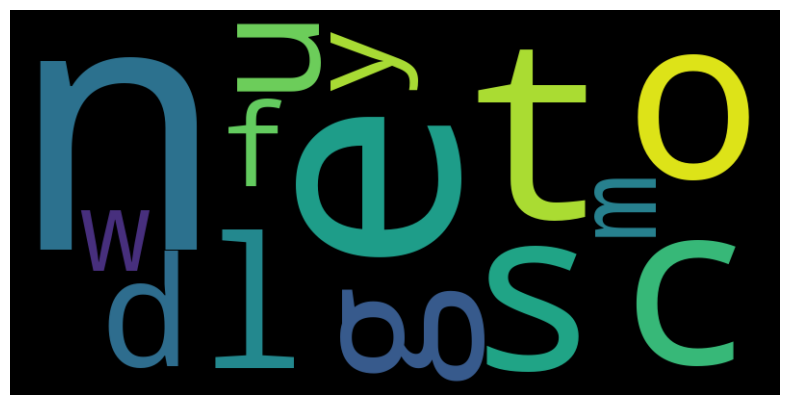

In [536]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(cleaned_text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

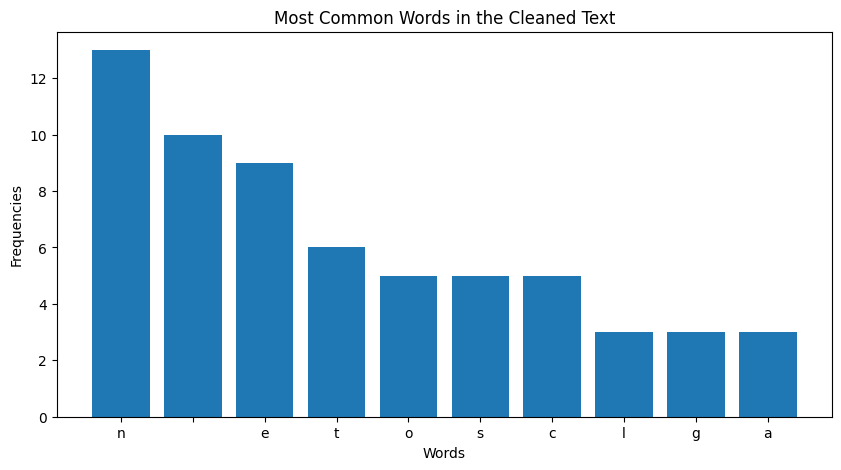

In [537]:
# Create a bar plot
word_freq = Counter(cleaned_text)
most_common_words = word_freq.most_common(10)
words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Most Common Words in the Cleaned Text')
plt.show()

In [538]:
# Analyze changes in word frequencies before and after cleaning
original_text = word_tokenize(text)
original_word_freq = Counter(original_text)
cleaned_word_freq = Counter(cleaned_text)

print("\nOriginal Word Frequencies:")
print(original_word_freq)

print("\nCleaned Word Frequencies:")
print(cleaned_word_freq)


Original Word Frequencies:
Counter({'is': 2, 'very': 2, 'long': 2, 'This': 1, 'a': 1, 'sentence': 1, 'that': 1, 'contains': 1, 'many': 1, 'words': 1, 'and': 1, 'used': 1, 'to': 1, 'test': 1, 'the': 1, 'cleaning': 1, 'function': 1, 'with': 1, 'sentences': 1, '.': 1})

Cleaned Word Frequencies:
Counter({'n': 13, ' ': 10, 'e': 9, 't': 6, 'o': 5, 's': 5, 'c': 5, 'l': 3, 'g': 3, 'a': 3, 'i': 3, 'd': 2, 'u': 2, 'm': 1, 'y': 1, 'w': 1, 'r': 1, 'f': 1})


In [539]:
# Calculate the difference in word frequencies
diff_word_freq = {}
for word in original_word_freq:
    if word in cleaned_word_freq:
        diff_word_freq[word] = cleaned_word_freq[word] - original_word_freq[word]
    else:
        diff_word_freq[word] = -original_word_freq[word]

for word in cleaned_word_freq:
    if word not in original_word_freq:
        diff_word_freq[word] = cleaned_word_freq[word]

print("\nDifference in Word Frequencies:")
print(diff_word_freq)


Difference in Word Frequencies:
{'This': -1, 'is': -2, 'a': 2, 'very': -2, 'long': -2, 'sentence': -1, 'that': -1, 'contains': -1, 'many': -1, 'words': -1, 'and': -1, 'used': -1, 'to': -1, 'test': -1, 'the': -1, 'cleaning': -1, 'function': -1, 'with': -1, 'sentences': -1, '.': -1, 'l': 3, 'o': 5, 'n': 13, 'g': 3, ' ': 10, 's': 5, 'e': 9, 't': 6, 'c': 5, 'i': 3, 'm': 1, 'y': 1, 'w': 1, 'r': 1, 'd': 2, 'u': 2, 'f': 1}
